## Agrex.AI Assignment

Importing the necessary libraries

In [1]:
import cv2
from tensorflow.keras.utils import array_to_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
%pip install -qr requirements.txt  # install

import torch
import utils
display = utils.notebook_init()  # checks

YOLOv5 🚀 v7.0-72-g064365d Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 23.6/78.2 GB disk)


Dividing the giving image into different sections

In [6]:
imgcv=cv2.imread('/content/agrex.jpeg')
img1=imgcv[440:560, 50:150]
img2=imgcv[440:640, 50:150]
img3=imgcv[440:640, 50:240]
img4=imgcv[440:550, 50:230]
img5=imgcv[720:820, 50:280]

Performing augmentation over the cropped out images

In [2]:
datagen=ImageDataGenerator(rotation_range=40,
                           shear_range=0.2,
                           horizontal_flip=True,
                           vertical_flip=True,
                           fill_mode='nearest')

Creating a total of 100 images which were further divided into 95(train) and 5(validation)

In [ ]:
import os

x=[img1.reshape((1,) + img1.shape),img2.reshape((1,) + img2.shape),img3.reshape((1,) + img3.shape),img4.reshape((1,) + img4.shape),img5.reshape((1,) + img5.shape)]
i=0
for j in x:
    for batch in datagen.flow(j, batch_size=1, save_to_dir='check1_data',save_format='jpg'):
        i+=1
        if i>=20:
            break
    i=0
    if len(os.listdir())>=100:
        break

Renaming the images in a **sequence**

In [ ]:
j=0
for i in os.listdir("check1_data/"):
    j+=1
    os.rename("check1_data/"+i,"numerical_encoded/"+f"{j}"+".jpeg")

Creating annotations for the images created, on makesense.ai

Creating a custom.yaml file to feed to the yolov5 model containing:





train: /content/drive/MyDrive/agrex_dataset/train

val: /content/drive/MyDrive/agrex_dataset/val

nc: 1
names: ['Transistor']



Creating separate directories for train and the validation data with separate folders for images and labels containing images and annotations repectively.

Training the model using yolov5 by calling yaml file which gives the model, description about the location of train and validation data.

Traing on a total of 100 epochs

In [7]:
!python train.py --img 640 --batch 16 --epochs 100 --data "/content/drive/MyDrive/agrex_dataset/custom.yaml" --weights yolov5s.pt --cache

train: weights=yolov5s.pt, cfg=, data=/content/drive/MyDrive/agrex_dataset/custom.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-72-g064365d Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0,

Testing the model for the given image

In [8]:
!python detect.py --weights "/content/yolov5/runs/train/exp/weights/best.pt" --img 640 --conf 0.25 --source "/content/drive/MyDrive/agrex_dataset/final.jpg"

detect: weights=['/content/yolov5/runs/train/exp/weights/best.pt'], source=/content/drive/MyDrive/agrex_dataset/final.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-72-g064365d Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/drive/MyDrive/agrex_dataset/final.jpg: 640x640 101 Transistors, 21.2ms
Speed: 0.6ms pre-process, 21.2ms inference, 1.6ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp


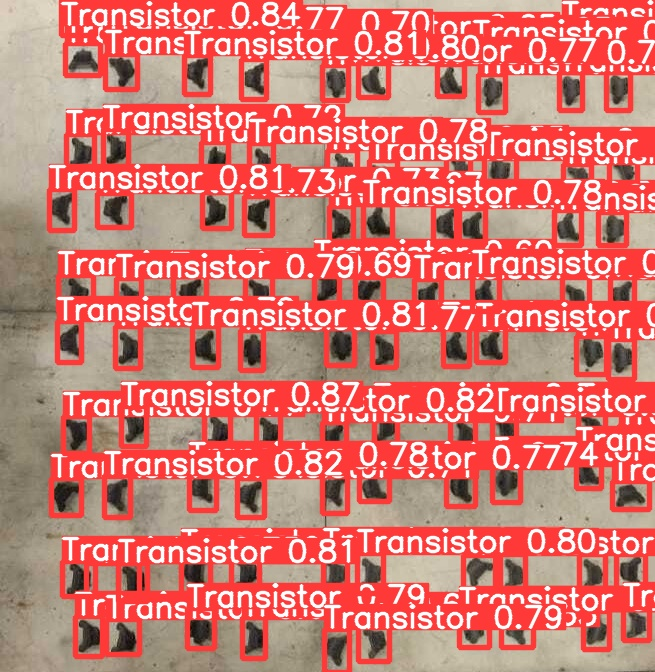

Detected a total of 101 transistors which is 1 more than the actual number.